In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

### We are trying to predict if sumone's will have a good loans or bad loans

In [2]:
loans = pd.read_csv('lending_club_data01.csv')
loans.head()

,int_rate,installment,open_acc,revol_bal,revol_util,total_acc,bad_loans,grade_num
0,10.65,162.87,3,13648,83.7,9,0,5
1,15.27,59.83,3,1687,9.4,4,1,4
2,15.96,84.33,2,2956,98.5,10,0,4
3,13.49,339.31,10,5598,21.0,37,0,4
4,7.90,156.46,9,7963,28.3,12,0,6


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   int_rate     1468 non-null   float64
 1   installment  1468 non-null   float64
 2   open_acc     1468 non-null   int64  
 3   revol_bal    1468 non-null   int64  
 4   revol_util   1468 non-null   float64
 5   total_acc    1468 non-null   int64  
 6   bad_loans    1468 non-null   int64  
 7   grade_num    1468 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.9 KB


In [4]:
loans['good_loans'] = loans['bad_loans'].apply(lambda y: 'yes' if y==0 else 'no')

lets just praticalize a little example of `lambda` below.  its states thats
> `lambda` input: true_return condition statement false_return

In [5]:
l1 = [1,2,3,4,5]
for i in l1:
    if 1>2:
        print('no')
    else:
        print('yes')
    break

yes


In [6]:
l1 = 2
lambda_funt = lambda j : 'yes' if j>3 else 'no'
print(lambda_funt(l1))

no


In [7]:
loans.head()

,int_rate,installment,open_acc,revol_bal,revol_util,total_acc,bad_loans,grade_num,good_loans
0,10.65,162.87,3,13648,83.7,9,0,5,yes
1,15.27,59.83,3,1687,9.4,4,1,4,no
2,15.96,84.33,2,2956,98.5,10,0,4,yes
3,13.49,339.31,10,5598,21.0,37,0,4,yes
4,7.90,156.46,9,7963,28.3,12,0,6,yes


In [8]:
X = loans.drop(['bad_loans', 'good_loans'], axis=1)
y = loans['good_loans']

In [9]:
X.shape, y.shape

((1468, 7), (1468,))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = model.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))

[[ 17  50]
 [ 61 313]]


In [16]:
pd.crosstab(y_test,
           y_pred,
           rownames=['true value'],
           colnames=['predicted value'])

predicted value,no,yes
true value,,
no,17,50
yes,61,313


In [17]:
15+52+68+306

441

In [18]:
15+306/441

15.693877551020408

In [19]:
52+68/441

52.15419501133787

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.22      0.25      0.23        67
         yes       0.86      0.84      0.85       374

    accuracy                           0.75       441
   macro avg       0.54      0.55      0.54       441
weighted avg       0.76      0.75      0.76       441



In [21]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=150)

In [23]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred1 = rf_model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.33      0.10      0.16        67
         yes       0.86      0.96      0.91       374

    accuracy                           0.83       441
   macro avg       0.60      0.53      0.53       441
weighted avg       0.78      0.83      0.79       441



In [26]:
7+60+15+359

441

In [27]:
359/374

0.9598930481283422

In [28]:
print(confusion_matrix(y_test, y_pred1))

[[  7  60]
 [ 14 360]]


# Lets consider a larger datasets to  build a Random Forest Class

In [29]:
loan1 = pd.read_csv('lending_club_new_data.csv')
loan1

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.000,171.62,0,11,5,0.4,1,8.143500
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.110,119.66,1,1,4,0.8,1,2.393200
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.000,649.91,0,11,4,1.0,1,8.259550
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.000,357.48,0,11,4,0.2,1,8.275850
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.000,161.03,0,4,6,0.8,1,5.215330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,6000,6000,6000,23.40,170.53,45600,1.50,1,0,3,...,0.00,0.00,0.000,170.53,1,0,2,1.0,0,4.487630
9512,15250,15250,15250,17.57,548.05,65000,11.26,1,2,8,...,0.00,0.00,0.000,14810.30,0,11,3,0.4,0,10.117800
9513,8525,8525,8525,18.25,217.65,37536,12.28,4,0,12,...,0.00,1159.40,11.594,217.65,1,6,3,0.6,0,6.958120
9514,22000,22000,22000,19.97,582.50,78000,18.45,0,5,18,...,0.00,0.00,0.000,17.50,1,11,3,1.0,1,8.961540


In [30]:
loan1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.00,171.62,0,11,5,0.4,1,8.14350
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.11,119.66,1,1,4,0.8,1,2.39320
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.00,649.91,0,11,4,1.0,1,8.25955
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.00,357.48,0,11,4,0.2,1,8.27585
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.00,161.03,0,4,6,0.8,1,5.21533


In [31]:
loan1['good_loans'] = loan1['bad_loans'].apply(lambda y: 'yes' if y==0 else 'no')

In [32]:
loan1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio,good_loans
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,171.62,0,11,5,0.4,1,8.14350,yes
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,117.08,1.11,119.66,1,1,4,0.8,1,2.39320,no
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,649.91,0,11,4,1.0,1,8.25955,yes
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,0.00,0.00,357.48,0,11,4,0.2,1,8.27585,yes
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,161.03,0,4,6,0.8,1,5.21533,yes


In [33]:
X = loan1.drop(['bad_loans', 'good_loans'], axis=1)
y = loan1['good_loans']

In [34]:
X.shape, y.shape

((9516, 23), (9516,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [36]:
dt_model = DecisionTreeClassifier()

In [37]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_preds = dt_model.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_preds))

[[ 444   11]
 [   9 2391]]


In [40]:
444+11+9+2391

2855

In [41]:
2391/2400

0.99625

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.98      0.98      0.98       455
         yes       1.00      1.00      1.00      2400

    accuracy                           0.99      2855
   macro avg       0.99      0.99      0.99      2855
weighted avg       0.99      0.99      0.99      2855



In [43]:
rf_model1 = RandomForestClassifier(n_estimators=150)

In [44]:
rf_model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_preds3 = rf_model1.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_preds3))

[[ 442   13]
 [   0 2400]]


In [47]:
print(classification_report(y_test, y_preds3))

              precision    recall  f1-score   support

          no       1.00      0.97      0.99       455
         yes       0.99      1.00      1.00      2400

    accuracy                           1.00      2855
   macro avg       1.00      0.99      0.99      2855
weighted avg       1.00      1.00      1.00      2855



In [48]:
pd.crosstab(y_test, y_preds3,
           rownames=['True Value'],
           colnames=['Predicted Value'])

Predicted Value,no,yes
True Value,,
no,442,13
yes,0,2400


In [49]:
loan1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_grade_num', 'delinq_2yrs_zero',
       'payment_inc_ratio', 'good_loans'],
      dtype='object')

In [50]:
X = loan1.drop(['bad_loans', 'good_loans', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
                'open_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], axis=1)

In [51]:
X.shape

(9516, 11)

In [52]:
y = loan1['good_loans']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=124)

In [54]:
mod = DecisionTreeClassifier()

In [55]:
mod.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
mod_pred = mod.predict(X_test)

In [57]:
print(confusion_matrix(y_test, mod_pred))

[[ 309  146]
 [ 168 2232]]


In [58]:
print(classification_report(y_test, mod_pred))

              precision    recall  f1-score   support

          no       0.65      0.68      0.66       455
         yes       0.94      0.93      0.93      2400

    accuracy                           0.89      2855
   macro avg       0.79      0.80      0.80      2855
weighted avg       0.89      0.89      0.89      2855



In [59]:
rf_mo1 = RandomForestClassifier(n_estimators=150)

In [60]:
rf_mo1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
prediction =  rf_mo1.predict(X_test)

In [62]:
import seaborn as sns

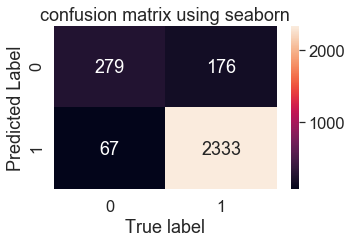

In [76]:
sns.set(font_scale=1.5)

def confu_mat(y_test, prediction):
    fig, ax = plt.subplots(figsize=(5,3))
    sns.heatmap(confusion_matrix(y_test, prediction),
               annot=True,
                fmt='g') # the fmt'g' make the heatmap to brings exactly what confusion is supposed to bring
    
    ax.set(xlabel='True label',
          ylabel='Predicted Label',
          title='confusion matrix using seaborn')
    
confu_mat(y_test, prediction)